In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

C:\Users\eldiy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
sns.set()

In [2]:
df=pd.read_csv('../../May/Week7/data/acs2015_county_data.csv')

In [3]:
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


# Lyrical staff
1. Predict unemployment
2. Drop State and County info
3. Normalize gender and other columns that make sense
4. I will consider TotalPop until column #20

In [5]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [6]:
df.columns[20]

'Service'

In [7]:
df.drop(['CensusId', 'State', 'County'],axis=1,inplace=True)

In [22]:
df.dropna(inplace=True)

In [23]:
df1=df.iloc[:,:20].copy()

In [24]:
df1.Women=df1.eval('Women/TotalPop')

In [25]:
df1.drop('Men',axis=1,inplace=True)

In [26]:
df1.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction
0,55221,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6
1,195121,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8
2,26932,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8
3,22604,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0
4,57710,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5


In [27]:
df1.Citizen=df1.eval('Citizen/TotalPop')

In [28]:
y=df.Unemployment

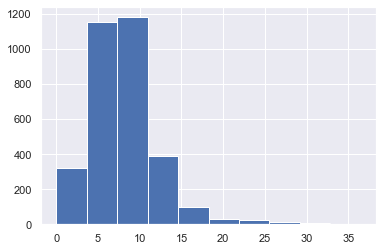

In [17]:
y.hist()

In [20]:
df1.dropna(inplace=True)

# Filter methods

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [30]:
df1.shape

(3218, 19)

In [31]:
y.shape

(3218,)

In [32]:
selection=SelectKBest(chi2,k=6)
X_new=selection.fit_transform(df1,y)

ValueError: Unknown label type: (array([ 7.6,  7.5, 17.6, ..., 25.9, 24.3, 27.1]),)

In [33]:
selection=SelectKBest(f_regression,k=6)
X_new=selection.fit_transform(df1,y)

In [36]:
pd.DataFrame(X_new).head()

,0,1,2,3,4,5
0,75.8,51281.0,24974.0,12.9,18.6,17.0
1,83.1,50254.0,27317.0,13.4,19.2,17.7
2,46.2,32964.0,16824.0,26.7,45.3,16.1
3,74.5,38678.0,18431.0,16.8,27.9,17.9
4,87.9,45813.0,20532.0,16.7,27.2,14.1


In [37]:
df1.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction
0,55221,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,0.737491,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6
1,195121,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,0.756941,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8
2,26932,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,0.769122,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8
3,22604,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,0.773978,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0
4,57710,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,0.733755,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5


In [41]:
df.corr()['Unemployment'].apply(abs).sort_values().tail(6)

Income          0.509054
White           0.540146
IncomePerCap    0.547239
ChildPoverty    0.678441
Poverty         0.712419
Unemployment    1.000000
Name: Unemployment, dtype: float64

In [44]:
selection=SelectKBest(f_classif,k=6)
X_new=selection.fit_transform(df1,y)

In [45]:
pd.DataFrame(X_new).head()

,0,1,2,3,4,5
0,2.6,75.8,0.4,24974.0,12.9,18.6
1,4.5,83.1,0.6,27317.0,13.4,19.2
2,4.6,46.2,0.2,16824.0,26.7,45.3
3,2.2,74.5,0.4,18431.0,16.8,27.9
4,8.6,87.9,0.3,20532.0,16.7,27.2


In [43]:
from sklearn.feature_selection import f_classif

# Wrappers

In [46]:
from sklearn.feature_selection import RFE

In [47]:
from sklearn.linear_model import LinearRegression

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [63]:
y

0        7.6
1        7.5
2       17.6
3        8.3
4        7.7
        ... 
3215    15.2
3216    12.2
3217    25.9
3218    24.3
3219    27.1
Name: Unemployment, Length: 3218, dtype: float64

In [60]:
estimator=LinearRegression()
selector=RFE(estimator,6)
selector=selector.fit(df1,y)

In [57]:
selector.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True, False,  True,
        True])

In [54]:
selector.ranking_

array([14,  1,  9,  5,  7,  4,  1,  2,  1, 13, 11, 12, 10,  1,  8,  3,  6,
        1,  1])

In [64]:
df1.columns[selector.support_]

Index(['Women', 'Asian', 'Citizen', 'Poverty', 'Office', 'Construction'], dtype='object')

In [97]:
estimator=LinearRegression()
sfs1=sfs(estimator,
         k_features=6,
         forward=True,
         floating=False,
         #scoring='neg_mean_squared_error'#default is r2
         cv=3
        )

In [98]:
sfs1=sfs1.fit(df1,y)
sfs1.get_metric_dict()

{1: {'feature_idx': (13,),
  'cv_scores': array([0.38135864, 0.46313776, 0.58272798]),
  'avg_score': 0.4757414636164687,
  'feature_names': ('Poverty',),
  'ci_bound': 0.18608053909491323,
  'std_dev': 0.0826903573030488,
  'std_err': 0.058470912387724366},
 2: {'feature_idx': (12, 13),
  'cv_scores': array([0.39564973, 0.50476464, 0.59165668]),
  'avg_score': 0.49735701461065474,
  'feature_names': ('IncomePerCapErr', 'Poverty'),
  'ci_bound': 0.1804556133650684,
  'std_dev': 0.08019075621275566,
  'std_err': 0.056703427506516794},
 3: {'feature_idx': (4, 12, 13),
  'cv_scores': array([0.40926295, 0.53880734, 0.59686493]),
  'avg_score': 0.5149784044634743,
  'feature_names': ('Black', 'IncomePerCapErr', 'Poverty'),
  'ci_bound': 0.17647030043698858,
  'std_dev': 0.07841976526662943,
  'std_err': 0.05545114779909095},
 4: {'feature_idx': (4, 12, 13, 17),
  'cv_scores': array([0.41888908, 0.54942988, 0.60707786]),
  'avg_score': 0.5251322712055172,
  'feature_names': ('Black', 'Income

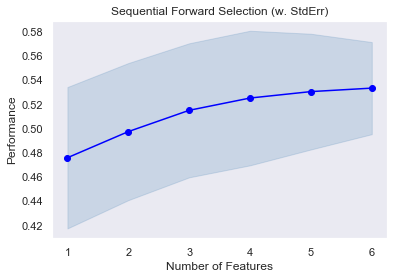

In [99]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Embedded

In [89]:
from sklearn.linear_model import RidgeCV, LassoCV

In [90]:
reg=LassoCV()
reg.fit(df1,y)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [91]:
print('best alpha is',reg.alpha_)
print('best R2 is',reg.score(df1,y))

best alpha is 39.616087326667376
best R2 is 0.3573384509102522


In [92]:
coef=pd.Series(reg.coef_, index=df1.columns)

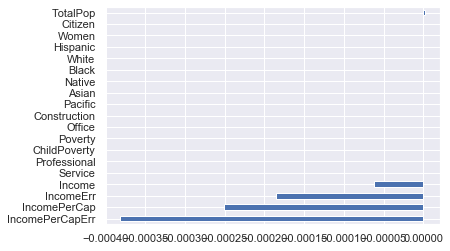

In [100]:
coef.sort_values().plot.barh()

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler=StandardScaler()
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
df2=pd.DataFrame(scaler.transform(df1),columns=df1.columns)

In [104]:
df2.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction
0,-0.138565,0.660336,-0.436917,0.015217,0.688328,-0.182113,-0.085542,-0.182552,-0.184323,0.399598,-0.238760,0.161477,-0.268357,-0.551957,-0.478020,0.346575,-0.369657,0.621936,-0.977755
1,0.299519,0.486149,-0.338162,0.333734,0.058063,-0.154533,-0.200496,-0.182552,0.185136,0.320025,-0.827824,0.539857,-0.623654,-0.491836,-0.426696,0.330871,-0.177057,1.529538,-0.455533
2,-0.227149,-1.598855,-0.332964,-1.276304,2.663158,-0.209694,-0.315449,-0.182552,0.416537,-1.019618,0.065172,-1.154696,-0.539885,1.107366,1.805875,-0.658506,-0.617287,0.277673,-0.455533
3,-0.240702,-1.424141,-0.457708,-0.041505,0.891413,-0.182113,-0.430402,-0.182552,0.508778,-0.576892,0.598881,-0.895176,0.249664,-0.083018,0.317494,-1.490838,-0.122028,-1.381049,1.490935
4,-0.130771,0.252929,-0.125057,0.543170,-0.502173,-0.195903,-0.430402,-0.182552,-0.255296,-0.024067,0.152905,-0.555878,-0.626543,-0.095042,0.257617,-0.391531,-1.167574,0.528046,0.185377


best alpha is 0.023648546249682885
best R2 is 0.5938434795401283


C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


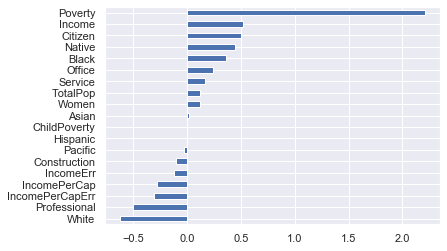

In [105]:
reg=LassoCV()
reg.fit(df2,y)
print('best alpha is',reg.alpha_)
print('best R2 is',reg.score(df2,y))
coef=pd.Series(reg.coef_, index=df2.columns)
coef.sort_values().plot.barh()

In [108]:
reg=RidgeCV()
reg.fit(df1,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(df1,y)}')

best alpha is 0.1
best score is 0.5958255863941373


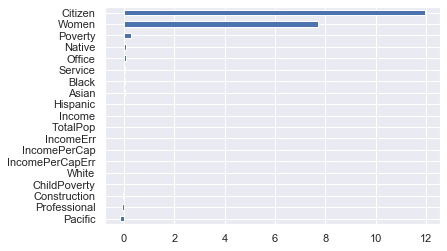

In [109]:
coef=pd.Series(reg.coef_,index=df1.columns)
coef.sort_values().plot.barh()

In [107]:
reg=RidgeCV()
reg.fit(df2,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(df2,y)}')

best alpha is 10.0
best score is 0.5957906320050343
